In [338]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [358]:
dataset = pd.read_csv('/home/sourav/Desktop/Project/google-play-store-analysis/Project/Data/googleplaystore.csv', parse_dates = ['Last Updated'])

In [359]:
(dataset['Last Updated'][10472])

'1.0.19'

In [360]:
type(pd.to_datetime(dataset['Last Updated'][1]))

pandas._libs.tslibs.timestamps.Timestamp

In [343]:
# dataset.loc[[10472]] = dataset.loc[[10472]].shift(periods=1, axis =1)
# dataset.loc[[10472]]

In [361]:
dataset['Category'][10472]

'1.9'

In [344]:
# dataset = dataset.fillna({
#         'App':  dataset.Category[10472], 
#         'Rating': dataset.Reviews[10472],
#         'Genres': 0
# })
# dataset = dataset.fillna(method = 'ffill')
# dataset.loc[[10472]]

In [362]:
dataset.drop(10472, inplace=True)

In [263]:
# for index in range(dataset.size):
#     if (dataset.count(axis = 1) < 13):
#         dataset.drop(index, inplace = True)
# dataset

In [264]:
#pd.to_datetime(dataset['Last Updated'])

In [363]:
dataset = dataset.fillna({
        'Rating':  0
})
dataset = dataset.fillna(method = 'ffill')

In [364]:
type(dataset['Rating'][0])

numpy.float64

In [365]:
dataset['Reviews'] = dataset['Reviews'].astype(int)
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [366]:
dataset['Installs'] = dataset['Installs'].map(lambda x: x.rstrip('+'))
dataset['Installs'] = dataset['Installs'].replace(',', '', regex = True)
dataset['Installs'] = dataset['Installs'].astype(int)

In [368]:
dataset = dataset.fillna({
        'Type':  'Free'
})

In [349]:
groupedData = dataset.groupby('Category')

In [350]:
for group, group_df  in groupedData:
    print(group)
    print(group_df)

ART_AND_DESIGN
                                                    App        Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                   Coloring book moana  ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                 Sketch - Draw & Paint  ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
5                            Paper flowers instructions  ART_AND_DESIGN   
6               Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN   
7                                      Infinite Painter  ART_AND_DESIGN   
8                                  Garden Coloring Book  ART_AND_DESIGN   
9                         Kids Paint Free - Drawing Fun  ART_AND_DESIGN   
10                              Text on Photo - Fonteee  ART_AND_DESIGN   
11              Name Art Photo Editor - Focus n Filters  ART_AND_DESIGN   
12        

[156 rows x 13 columns]
ENTERTAINMENT
                                                    App       Category  \
855                                             Netflix  ENTERTAINMENT   
856                             Complete Spanish Movies  ENTERTAINMENT   
857                             Pluto TV - It’s Free TV  ENTERTAINMENT   
858                          Tubi TV - Free Movies & TV  ENTERTAINMENT   
859                                        YouTube Kids  ENTERTAINMENT   
860                                           Mobile TV  ENTERTAINMENT   
861                                                 TV+  ENTERTAINMENT   
862                                          Digital TV  ENTERTAINMENT   
863                          Motorola Spotlight Player™  ENTERTAINMENT   
864                                           Vigo Lite  ENTERTAINMENT   
865                                   Google Play Games  ENTERTAINMENT   
866                                             Hotstar  ENTERTAINMENT   


[335 rows x 13 columns]
PRODUCTIVITY
                                                     App      Category  \
3450                                      Microsoft Word  PRODUCTIVITY   
3451   All-In-One Toolbox: Cleaner, Booster, App Manager  PRODUCTIVITY   
3452                                Adobe Acrobat Reader  PRODUCTIVITY   
3453       AVG Cleaner – Speed, Battery & Memory Booster  PRODUCTIVITY   
3454                                        Google Drive  PRODUCTIVITY   
3455                   QR Scanner & Barcode Scanner 2018  PRODUCTIVITY   
3456                                         Chrome Beta  PRODUCTIVITY   
3457                                   Microsoft Outlook  PRODUCTIVITY   
3458                                   Google PDF Viewer  PRODUCTIVITY   
3459                                     Microsoft Excel  PRODUCTIVITY   
3460                                       My Claro Peru  PRODUCTIVITY   
3461   Power Booster - Junk Cleaner & CPU Cooler & Boost  PRODUCTIVITY   
3

In [351]:
groupedData.max()

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
Category,,,,,,,,,
ART_AND_DESIGN,صور حرف H,5.0,295237,Varies with device,50000000,0,Teen,Art & Design;Pretend Play,"September 20, 2017"
AUTO_AND_VEHICLES,Билеты ПДД CD 2019 PRO,4.9,271920,Varies with device,10000000,0,Teen,Auto & Vehicles,"October 28, 2016"
BEAUTY,"ipsy: Makeup, Beauty, and Tips",4.9,113715,Varies with device,10000000,0,Teen,Beauty,"September 20, 2017"
BOOKS_AND_REFERENCE,日本AV历史,5.0,2915189,Varies with device,1000000000,0,Teen,Books & Reference,"September 6, 2015"
BUSINESS,sABN,5.0,1279800,Varies with device,100000000,0,Teen,Business,"September 6, 2017"
COMICS,감성학원 BL 첫사랑,5.0,1013944,Varies with device,10000000,0,Teen,Comics;Creativity,"September 29, 2015"
COMMUNICATION,哈哈姆特不EY,5.0,69119316,Varies with device,1000000000,0,Teen,Communication,"September 6, 2016"
DATING,stranger chat - anonymous chat,5.0,516917,Varies with device,10000000,0,Teen,Dating,"September 1, 2017"
EDUCATION,"play2prep: ACT, SAT prep",4.9,6290507,Varies with device,100000000,0,Teen,Education;Pretend Play,"September 28, 2017"


In [352]:
groupedData.mean()

,Rating,Reviews,Installs
Category,,,
ART_AND_DESIGN,4.358065,2.637600e+04,1.912894e+06
AUTO_AND_VEHICLES,4.190411,1.369019e+04,6.250613e+05
BEAUTY,4.278571,7.476226e+03,5.131519e+05
BOOKS_AND_REFERENCE,4.346067,9.506090e+04,8.318050e+06
BUSINESS,4.121452,3.033598e+04,2.178076e+06
COMICS,4.155172,5.638793e+04,9.347692e+05
COMMUNICATION,4.158537,2.107138e+06,8.435989e+07
DATING,3.970769,3.115931e+04,1.129533e+06
EDUCATION,4.389032,2.538191e+05,5.586231e+06


/home/sourav/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Category
ART_AND_DESIGN         AxesSubplot(0.125,0.125;0.775x0.755)
AUTO_AND_VEHICLES      AxesSubplot(0.125,0.125;0.775x0.755)
BEAUTY                 AxesSubplot(0.125,0.125;0.775x0.755)
BOOKS_AND_REFERENCE    AxesSubplot(0.125,0.125;0.775x0.755)
BUSINESS               AxesSubplot(0.125,0.125;0.775x0.755)
COMICS                 AxesSubplot(0.125,0.125;0.775x0.755)
COMMUNICATION          AxesSubplot(0.125,0.125;0.775x0.755)
DATING                 AxesSubplot(0.125,0.125;0.775x0.755)
EDUCATION              AxesSubplot(0.125,0.125;0.775x0.755)
ENTERTAINMENT          AxesSubplot(0.125,0.125;0.775x0.755)
EVENTS                 AxesSubplot(0.125,0.125;0.775x0.755)
FAMILY                 AxesSubplot(0.125,0.125;0.775x0.755)
FINANCE                AxesSubplot(0.125,0.125;0.775x0.755)
FOOD_AND_DRINK         AxesSubplot(0.125,0.125;0.775x0.755)
GAME                   AxesSubplot(0.125,0.125;0.775x0.755)
HEALTH_AND_FITNESS     AxesSubplot(0.125,0.125;0.775x0.755)
HOUSE_AND_HOME         AxesSubp

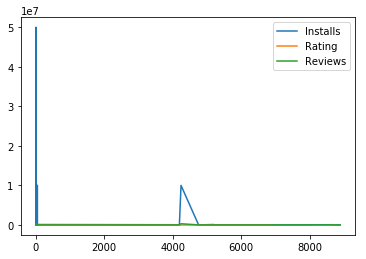

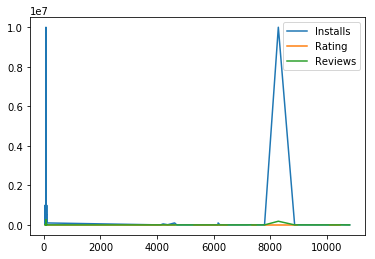

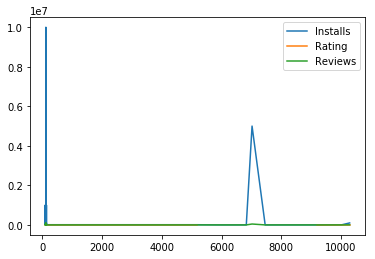

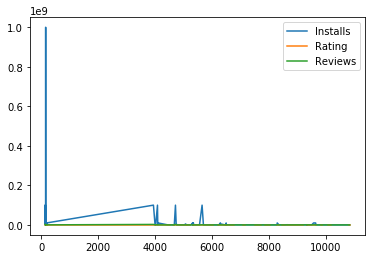

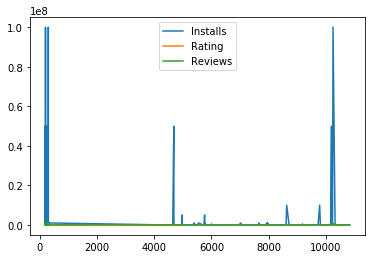

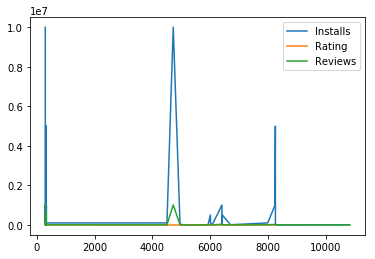

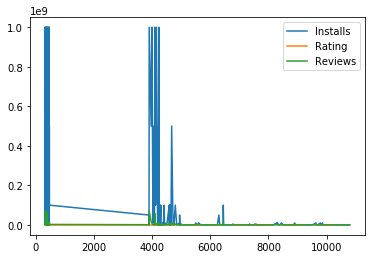

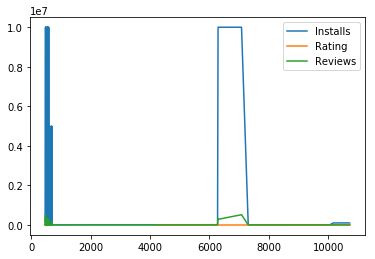

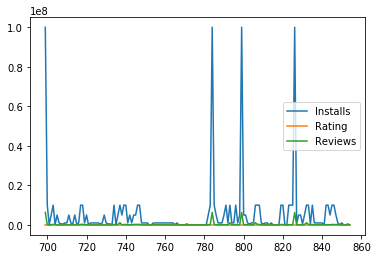

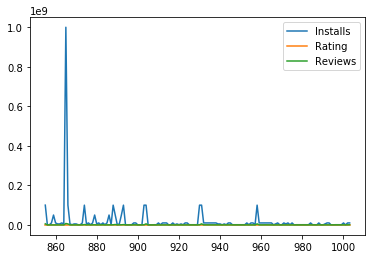

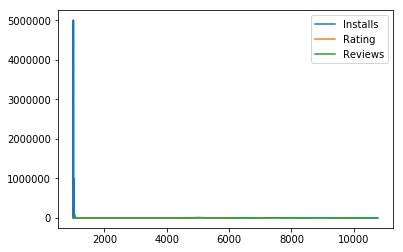

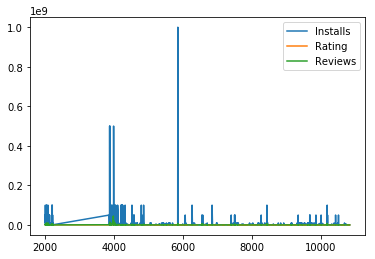

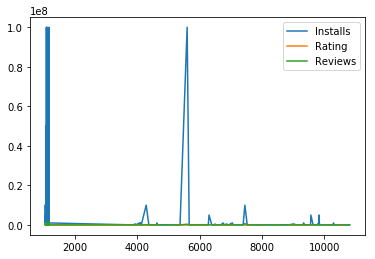

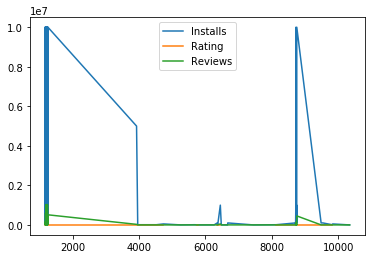

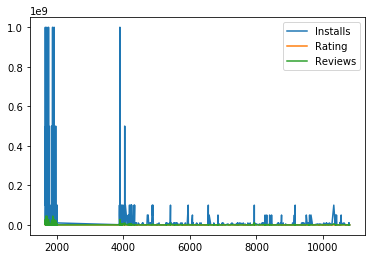

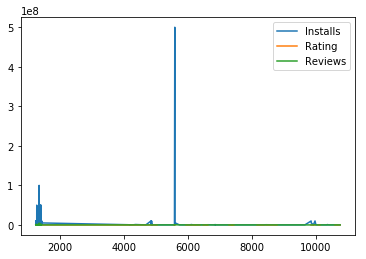

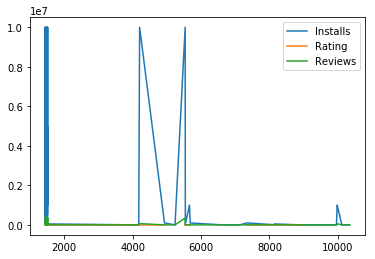

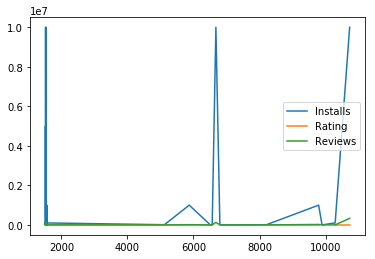

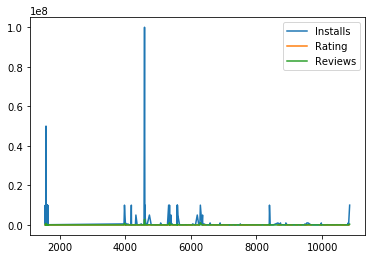

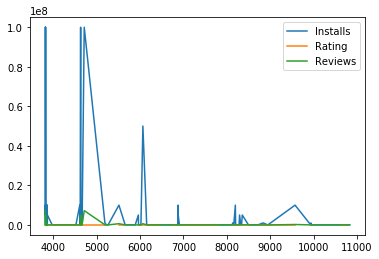

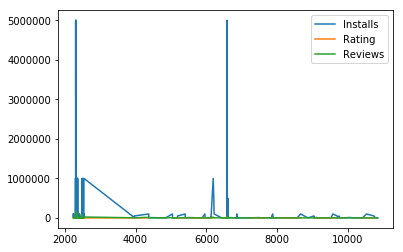

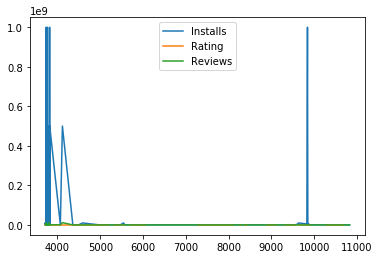

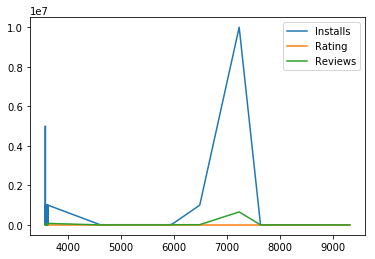

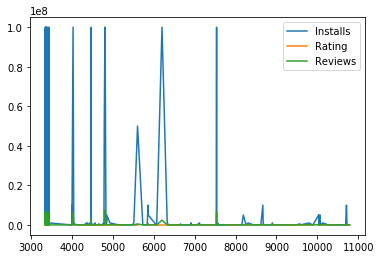

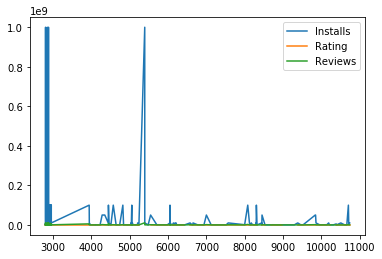

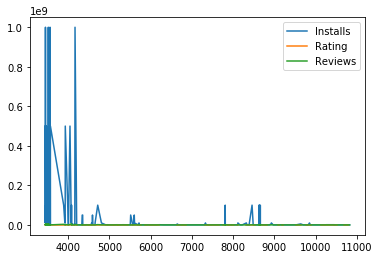

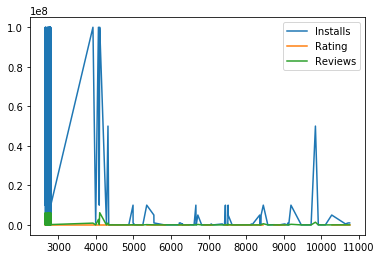

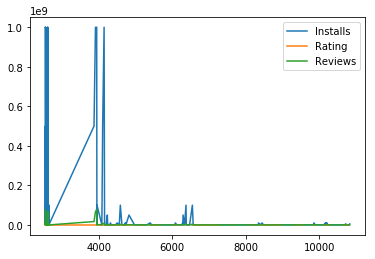

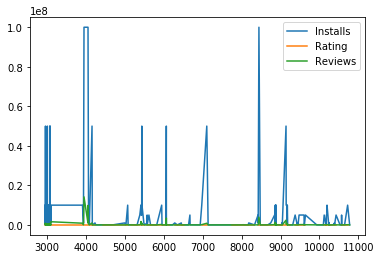

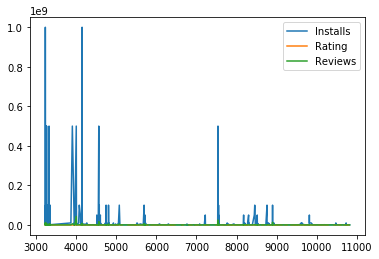

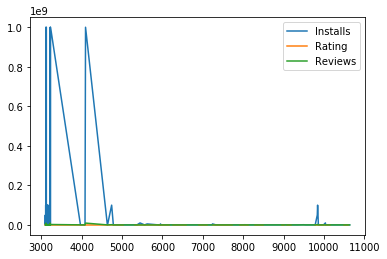

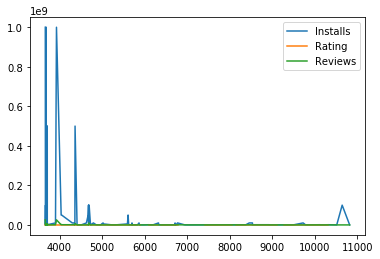

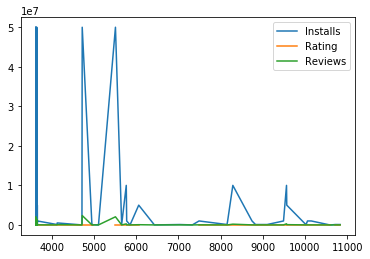

In [369]:
groupedData.plot()